In [1]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [2]:
# df=pd.read_csv('C:/Users/pudge/Downloads/EURRUB_200217_220317 (1).txt',sep=';',parse_dates=['<DATE>'])
# df=df.rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<HIGH>':'HIGH','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<TIME>':'TIME'})

In [3]:
# df['HOUR']=hour_list

In [4]:
# df['HOUR_COS'] = df['HOUR'].apply(lambda x: math.cos(x * 2 * math.pi / 24))
# df['HOUR_SIN'] =  df['HOUR'].apply(lambda x: math.sin(x * 2 * math.pi / 24))
# df.head()

In [5]:
# df.to_csv('EURUB.csv')

In [6]:
df = pd.read_csv('../input/eurrub/EURUB.csv', )

df.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
0,0,2020-02-17,10000,68.8092,68.8890,68.7750,68.8125,73,1,0.965926,0.258819
1,1,2020-02-17,20000,68.7706,68.9820,68.7182,68.7404,172,2,0.866025,0.500000
2,2,2020-02-17,30000,68.8468,68.8774,68.7245,68.7886,114,3,0.707107,0.707107
3,3,2020-02-17,40000,68.7886,68.8540,68.7750,68.8072,116,4,0.500000,0.866025
4,4,2020-02-17,50000,68.8091,68.8550,68.7108,68.7144,514,5,0.258819,0.965926


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 11 columns):
Unnamed: 0    13312 non-null int64
DATE          13312 non-null object
TIME          13312 non-null int64
OPEN          13312 non-null float64
HIGH          13312 non-null float64
LOW           13312 non-null float64
CLOSE         13312 non-null float64
VOL           13312 non-null int64
HOUR          13312 non-null int64
HOUR_COS      13312 non-null float64
HOUR_SIN      13312 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.1+ MB


In [8]:
df_day = df[df['HOUR']==12]

In [9]:
df_day.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
11,11,2020-02-17,120000,68.5798,68.6910,68.5224,68.6717,6560,12,-1.0,1.224647e-16
35,35,2020-02-18,120000,69.1413,69.1875,68.9721,69.0699,7113,12,-1.0,1.224647e-16
59,59,2020-02-19,120000,68.6987,68.7970,68.6419,68.7573,6924,12,-1.0,1.224647e-16
83,83,2020-02-20,120000,68.7061,68.9059,68.6464,68.8996,7150,12,-1.0,1.224647e-16
107,107,2020-02-21,120000,69.4257,69.6400,69.3659,69.5110,7496,12,-1.0,1.224647e-16


In [10]:
from sklearn.model_selection import train_test_split
train_columns = ['DATE','OPEN']
train = df_day[train_columns][:-15]
train = train.rename(columns={'DATE':'ds','OPEN':'y'})


In [11]:
train.tail(10)

,ds,y
12731,2022-02-07,87.4290
12755,2022-02-08,86.2320
12779,2022-02-09,85.6379
12803,2022-02-10,85.3108
12827,2022-02-11,85.7616
12851,2022-02-12,87.3760
12875,2022-02-14,87.3217
12899,2022-02-15,85.8882
12923,2022-02-16,85.6255
12947,2022-02-17,86.6820


In [12]:
m = Prophet()
# m.add_seasonality(name='yearly', period=12, fourier_order=5)
m.fit(train)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-17,69.321293,68.064305,70.648012
1,2020-02-18,69.564356,68.239576,71.018116
2,2020-02-19,69.774282,68.437301,71.105762
3,2020-02-20,70.160473,68.799992,71.552720
4,2020-02-21,70.407351,69.001141,71.774975
5,2020-02-24,71.586733,70.267918,72.821523
6,2020-02-25,71.951072,70.577374,73.266761
7,2020-02-26,72.294180,70.987742,73.566771
8,2020-02-27,72.823415,71.518616,74.120802
9,2020-02-28,73.220894,71.881241,74.431920


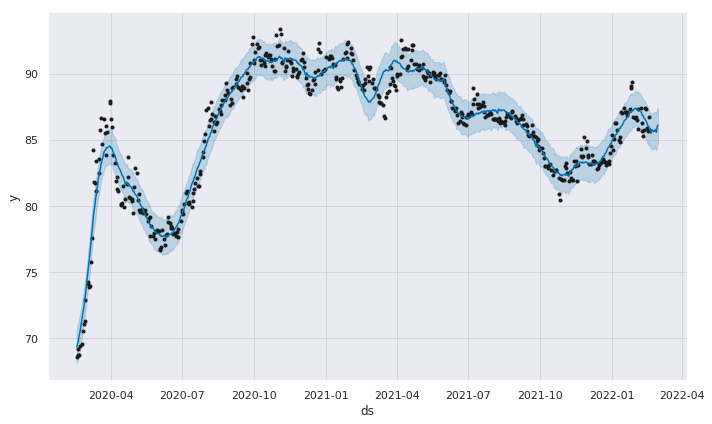

In [14]:
figure = m.plot(forecast)

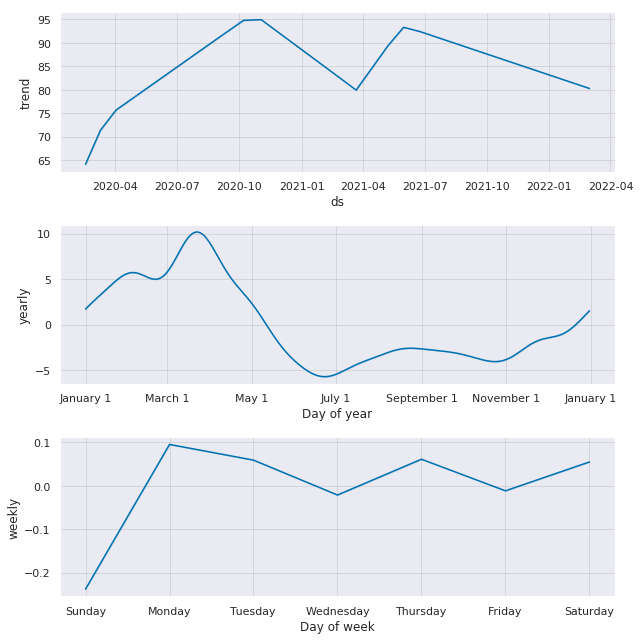

In [15]:
fig_decompose = m.plot_components(forecast)

In [16]:
m2 = Prophet(weekly_seasonality=False, daily_seasonality=False, n_changepoints=2)
m2.add_seasonality(name='yearly', period=12, fourier_order=2)

m2.fit(train)
future2 = m2.make_future_dataframe(periods=12,freq='W')
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:fbprophet.forecaster:Found custom seasonality named "yearly", disabling built-in yearly seasonality.


,ds,yhat,yhat_lower,yhat_upper
522,2022-01-26,85.007797,81.975689,88.297421
523,2022-01-27,84.875573,81.262727,88.134615
524,2022-01-28,84.722161,81.493601,88.023735
525,2022-01-31,85.081239,81.659613,88.161708
526,2022-02-01,85.145510,81.898160,88.214331
527,2022-02-02,85.021752,81.704312,88.129381
528,2022-02-03,84.835478,81.564936,88.094743
529,2022-02-04,84.759589,81.876614,88.207075
530,2022-02-07,84.991673,81.974414,88.474250
531,2022-02-08,84.859449,81.446694,88.399546


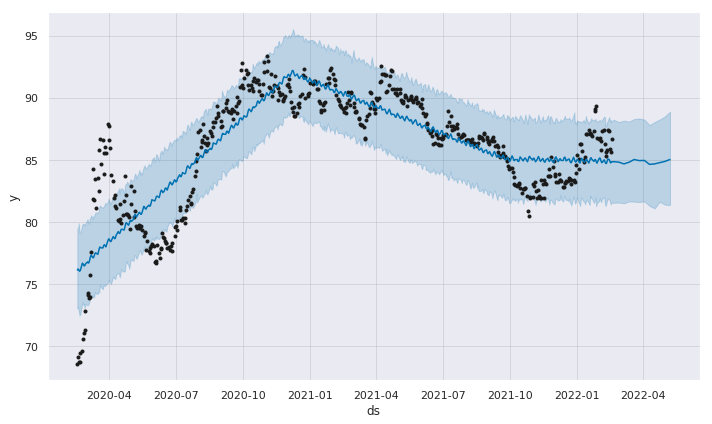

In [17]:
fig2 = m2.plot(forecast2)

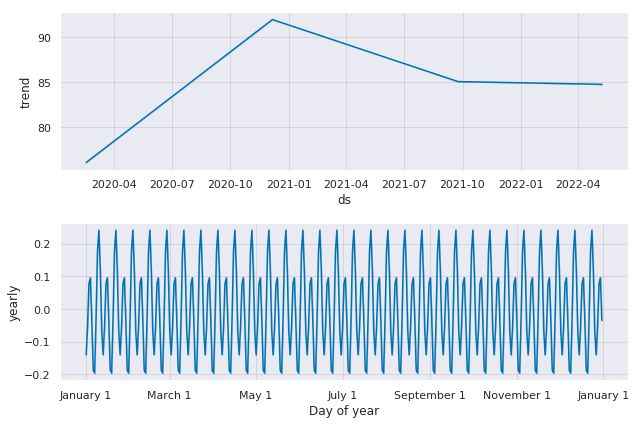

In [18]:
fig2_decompose = m2.plot_components(forecast2)